<a href="https://colab.research.google.com/github/smkandel/DS_project/blob/main/Credit_Card_Application_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project shows the data preprocessing, data visualization and predictive modeling for credit card application which is useful in forecasting credit card usage, predicting customer churn, anticipate changes in market trend and helps to make data-driven decision.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/application_data.csv'
df=pd.read_csv(path)

In [ ]:
df.shape[0]

307511

In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


1) Find all categorical variables

2) Find Count of instances in 0 and 1 class in TARGET column

3) Find % of instances in 0 and 1 class in TARGET column

4) Bar chart for both 2nd and 3rd

5) Find unique values in each column

6) Find how many nan values in each column

7) Preprocessing for each column differeny=tly according to the nan values in each column

Find the name of the columns above 50% missing values and remove them from data frame

Once you remove again print out the missing values in each column and try to see columns above 45% missing values can be removed or not based on importance


8) As all remaining columns with missing value above 40% are normalized we need to remove them as their is no way to substitute values in them


9) Analysis of OCCUPATION_TYPE do a plot showing count of each category

10) which category comes the most in OCCUPATION_TYPE  column

11) How many TARGET COLUMNS are 1 and 0 for most reoccurring category in OCCUPATION_TYPE   column

12) How many TARGET COLUMNS are 1 and have OCCUPATION_TYPE  column  as labourer

13) pie chart for counts of NAME_CONTRACT_TYPE and NAME_INCOME_TYPE

14) Sample Homework

a) Remove  occupation type column and fill remaining nan values with mode or median and apply Random Forest, ANN,KNN,SVM and logistic regression and compare results using a bar chart for each model


In [ ]:
#1 Count of Categorical Columns
data_types = df.dtypes
categorical_columns = data_types[data_types == 'object'].index

print(categorical_columns)
categorical_columns.shape

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


(16,)

In [ ]:
#2) Find Count of instances in 0 and 1 class in TARGET column
count_of_target_class=df['TARGET'].value_counts()
count_of_target_class

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [ ]:
# 3) Find % of instances in 0 and 1 class in TARGET column
percentage_of_target_class=(df['TARGET'].value_counts()/df.shape[0])*100
percentage_of_target_class

TARGET
0    91.927118
1     8.072882
Name: count, dtype: float64

Text(0.5, 1.0, 'Count of Observations in Target Class')

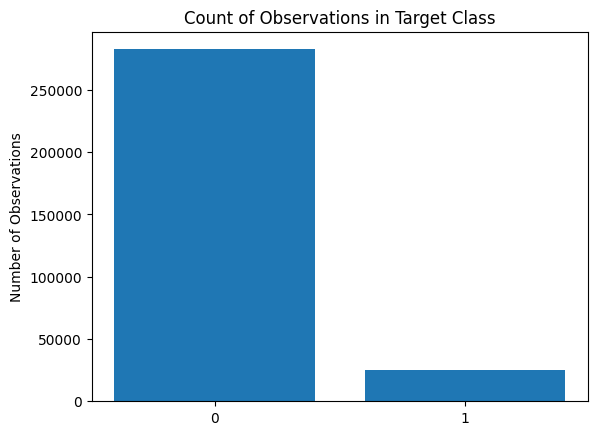

In [ ]:
#4) Bar chart for both 2nd and 3rd
plt.bar([0,1],count_of_target_class.values)
plt.xticks([0,1])
plt.ylabel("Number of Observations")
plt.title("Count of Observations in Target Class")

Text(0.5, 1.0, 'Percentage of Observations in Target Class')

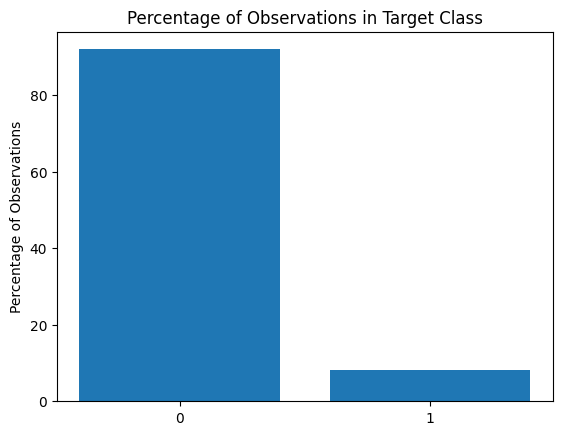

In [ ]:
plt.bar([0,1],percentage_of_target_class.values)
plt.xticks([0,1])
plt.ylabel("Percentage of Observations")
plt.title("Percentage of Observations in Target Class")

In [ ]:
# 5) Find unique values in each column
column_names=list(df.columns)
for k in column_names:
  print(k, df[k].unique().shape[0])

SK_ID_CURR 307511
TARGET 2
NAME_CONTRACT_TYPE 2
CODE_GENDER 3
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2
CNT_CHILDREN 15
AMT_INCOME_TOTAL 2548
AMT_CREDIT 5603
AMT_ANNUITY 13673
AMT_GOODS_PRICE 1003
NAME_TYPE_SUITE 8
NAME_INCOME_TYPE 8
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 6
NAME_HOUSING_TYPE 6
REGION_POPULATION_RELATIVE 81
DAYS_BIRTH 17460
DAYS_EMPLOYED 12574
DAYS_REGISTRATION 15688
DAYS_ID_PUBLISH 6168
OWN_CAR_AGE 63
FLAG_MOBIL 2
FLAG_EMP_PHONE 2
FLAG_WORK_PHONE 2
FLAG_CONT_MOBILE 2
FLAG_PHONE 2
FLAG_EMAIL 2
OCCUPATION_TYPE 19
CNT_FAM_MEMBERS 18
REGION_RATING_CLIENT 3
REGION_RATING_CLIENT_W_CITY 3
WEEKDAY_APPR_PROCESS_START 7
HOUR_APPR_PROCESS_START 24
REG_REGION_NOT_LIVE_REGION 2
REG_REGION_NOT_WORK_REGION 2
LIVE_REGION_NOT_WORK_REGION 2
REG_CITY_NOT_LIVE_CITY 2
REG_CITY_NOT_WORK_CITY 2
LIVE_CITY_NOT_WORK_CITY 2
ORGANIZATION_TYPE 58
EXT_SOURCE_1 114585
EXT_SOURCE_2 119832
EXT_SOURCE_3 815
APARTMENTS_AVG 2340
BASEMENTAREA_AVG 3781
YEARS_BEGINEXPLUATATION_AVG 286
YEARS_BUILD_AVG 150
COMMONARE

In [ ]:
# 6) Find how many nan values in each column
df_missing_value_percentage = 100*df.isnull().sum()/len(df)
for k in range(df_missing_value_percentage.shape[0]):
  print(column_names[k],df_missing_value_percentage.iloc[k])

SK_ID_CURR 0.0
TARGET 0.0
NAME_CONTRACT_TYPE 0.0
CODE_GENDER 0.0
FLAG_OWN_CAR 0.0
FLAG_OWN_REALTY 0.0
CNT_CHILDREN 0.0
AMT_INCOME_TOTAL 0.0
AMT_CREDIT 0.0
AMT_ANNUITY 0.0039022994299390914
AMT_GOODS_PRICE 0.09040327012692229
NAME_TYPE_SUITE 0.42014757195677555
NAME_INCOME_TYPE 0.0
NAME_EDUCATION_TYPE 0.0
NAME_FAMILY_STATUS 0.0
NAME_HOUSING_TYPE 0.0
REGION_POPULATION_RELATIVE 0.0
DAYS_BIRTH 0.0
DAYS_EMPLOYED 0.0
DAYS_REGISTRATION 0.0
DAYS_ID_PUBLISH 0.0
OWN_CAR_AGE 65.9908100848425
FLAG_MOBIL 0.0
FLAG_EMP_PHONE 0.0
FLAG_WORK_PHONE 0.0
FLAG_CONT_MOBILE 0.0
FLAG_PHONE 0.0
FLAG_EMAIL 0.0
OCCUPATION_TYPE 31.345545362604916
CNT_FAM_MEMBERS 0.000650383238323182
REGION_RATING_CLIENT 0.0
REGION_RATING_CLIENT_W_CITY 0.0
WEEKDAY_APPR_PROCESS_START 0.0
HOUR_APPR_PROCESS_START 0.0
REG_REGION_NOT_LIVE_REGION 0.0
REG_REGION_NOT_WORK_REGION 0.0
LIVE_REGION_NOT_WORK_REGION 0.0
REG_CITY_NOT_LIVE_CITY 0.0
REG_CITY_NOT_WORK_CITY 0.0
LIVE_CITY_NOT_WORK_CITY 0.0
ORGANIZATION_TYPE 0.0
EXT_SOURCE_1 56.3810725

In [ ]:
#7) Preprocessing for each column differently according to the nan values in each column. Find the name of the columns above 50% missing values and remove them from data frame. Once you remove again print out the missing values in each column and try to see columns above 45% missing values can be removed or not based on importance
dropped_col= df.columns[df.isnull().mean()>0.50]
df=df.drop(dropped_col, axis=1)
df



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Print missing values again after removal
nan_values_after_removal = df.isnull().sum()
print("\nMissing values in each column after removal:")
print(nan_values_after_removal)


Missing values in each column after removal:
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 81, dtype: int64


In [ ]:
#8) As all remaining columns with missing value above 40% are normalized we need to remove them as their is no way to substitute values in them
dropped_col= df.columns[df.isnull().mean()>0.40]
df=df.drop(dropped_col, axis=1)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


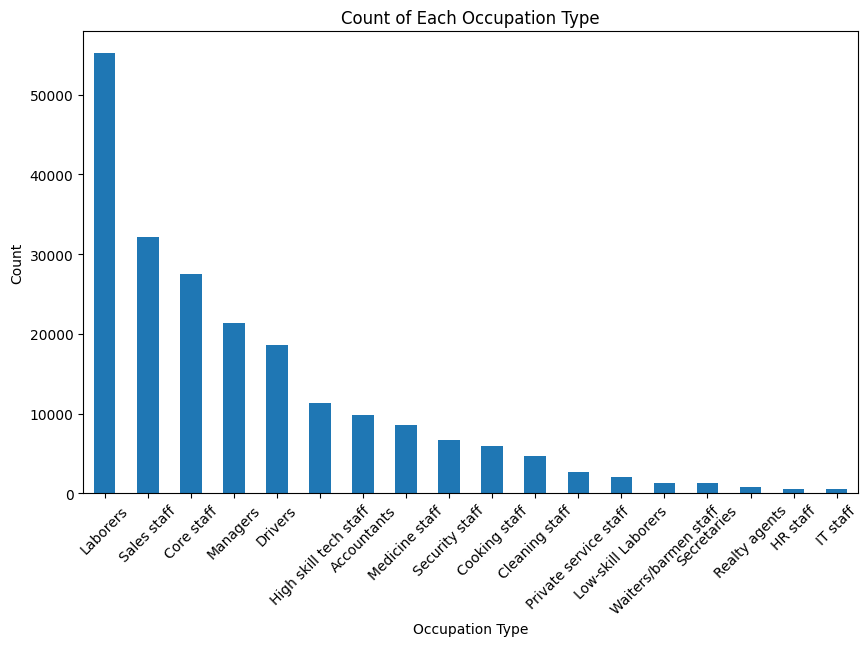

In [ ]:
#9) Analysis of OCCUPATION_TYPE do a plot showing count of each category.
occupation_counts =df['OCCUPATION_TYPE'].value_counts()
plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='bar')
plt.xlabel("Occupation Type")
plt.ylabel("Count")
plt.title("Count of Each Occupation Type")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#10) which category comes the most in OCCUPATION_TYPE column
most_common= df['OCCUPATION_TYPE'].value_counts().idxmax()
most_common

'Laborers'

In [ ]:
#11) How many TARGET COLUMNS are 1 and 0 for most reoccurring category in OCCUPATION_TYPE column
occupation_data=df[df['OCCUPATION_TYPE']==most_common]
target_counts=occupation_data['TARGET'].value_counts()
target_1_count = target_counts.get(1, 0)
print('Target columns are 1:', target_1_count)
target_0_count = target_counts.get(0, 0)
print('Target columns are 0:', target_0_count)

Target columns are 1: 5838
Target columns are 0: 49348


In [ ]:
#12) How many TARGET COLUMNS are 1 and have OCCUPATION_TYPE column as labourer
dat=df[(df['OCCUPATION_TYPE']=='Laborers') & (df['TARGET']==1)]
dat
len(dat)


5838

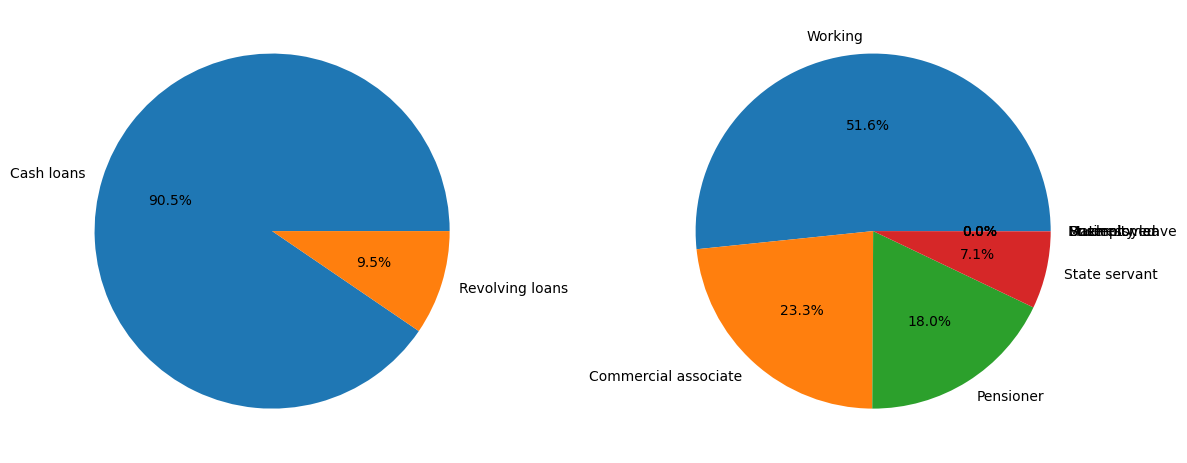

In [ ]:
#13) pie chart for counts of NAME_CONTRACT_TYPE and NAME_INCOME_TYPE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
a= df['NAME_CONTRACT_TYPE'].value_counts()
plt.pie(a, labels=a.index, autopct='%1.1f%%')

plt.subplot(1, 2, 2)
b=df['NAME_INCOME_TYPE'].value_counts()
plt.pie(b, labels=b.index, autopct='%1.1f%%')

plt.tight_layout()
plt.show()

Random Forest, ANN,KNN,SVM and logistic regression and compare results using a bar chart for each model

In [ ]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 73, dtype: int64

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Define the feature columns
feature_columns = ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

# Define the target variable
target_variable = 'TARGET'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[feature_columns], df[target_variable], test_size=0.2, random_state=42)

# Perform one-hot encoding on categorical variables
categorical_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', dtype=int)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_features]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_features]))

# Reindex the encoded features dataframe
X_train_encoded.index = X_train.index
X_test_encoded.index = X_test.index

# Convert feature names to strings
X_train_encoded.columns = X_train_encoded.columns.astype(str)
X_test_encoded.columns = X_test_encoded.columns.astype(str)

# Concatenate encoded features with numerical features
X_train_processed = pd.concat([X_train.drop(categorical_features, axis=1), X_train_encoded], axis=1)
X_test_processed = pd.concat([X_test.drop(categorical_features, axis=1), X_test_encoded], axis=1)

# Drop rows with missing values
missing_rows = X_train_processed.isnull().any(axis=1)
X_train_processed = X_train_processed[~missing_rows]
y_train = y_train[~missing_rows]

# Create the random forest classifier
randomforest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
randomforest_model.fit(X_train_processed, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RandomForestClassifier(random_state=42)

In [ ]:
#Impute missing values
from sklearn.impute import SimpleImputer
# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train_processed)
X_test_imputed = imputer.transform(X_test_processed)

##Accuracy Assessment
from sklearn.metrics import accuracy_score
# Make predictions on the test set
y_pred = randomforest_model.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9195486399037446


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model on the imputed data
logistic_model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test_imputed)

# Calculate accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

print("Accuracy:", accuracy_logistic)

Accuracy: 0.9195161211648212


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

# Create the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the imputed data
knn_model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_imputed)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)

Accuracy: 0.9147033478041722


In [ ]:

from sklearn.neighbors import KNeighborsClassifier

# Create the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the imputed data
knn_model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_imputed)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)


Accuracy: 0.9147033478041722
